In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import scipy.stats as st
import os.path
from os import path
import json

output_data_player_details_CA = "output_data/player_details_CA.csv"
output_data_player_details_RU = "output_data/player_details_RU.csv"
output_data_player_details_MX = "output_data/player_details_MX.csv"

In [31]:
# get joined_yearmonth dataframe for player details file
def get_joined_yearmonth_dataframe(output_data_player_details):
    chessplayers_df = pd.read_csv(output_data_player_details)
    joined_dates = []
    joined_yearmonths = []
    for index, row in chessplayers_df.iterrows():        
        try:                  
            joined_date = time.strftime('%Y-%m-%d', time.localtime(row["joined"]))
            joined_dates.append(joined_date)        
        except: 
            print("unepxected error/skipping country")
    chessplayers_df["joined_date"] = joined_dates
    chessplayers_df["joined_yearmonth"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m")
    chessplayers_df.sort_values(by=["joined_yearmonth"])
    return chessplayers_df

In [40]:
# CANADA
chessplayers_CA_df = get_joined_yearmonth_dataframe(output_data_player_details_CA)

# RUSSIA
chessplayers_RU_df = get_joined_yearmonth_dataframe(output_data_player_details_RU)

# MEXICO
chessplayers_MX_df = get_joined_yearmonth_dataframe(output_data_player_details_MX)


In [26]:
groupby_yearmonth_CA = chessplayers_CA_df.groupby(["joined_yearmonth"])
groupby_yearmonth_RU = chessplayers_RU_df.groupby(["joined_yearmonth"])
groupby_yearmonth_MX = chessplayers_RU_df.groupby(["joined_yearmonth"])


In [42]:
groupby_yearmonth_CA_count_df = groupby_yearmonth_CA["joined_yearmonth"].count()
groupby_yearmonth_RU_count_df = groupby_yearmonth_RU["joined_yearmonth"].count()
groupby_yearmonth_MX_count_df = groupby_yearmonth_RU["joined_yearmonth"].count()

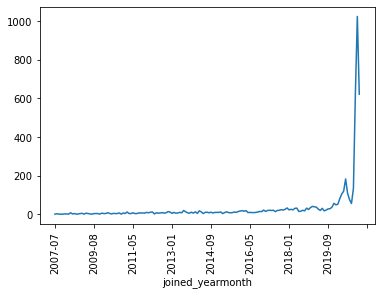

In [10]:
groupby_yearmonth_CA_count_df.plot()

plt.xticks(rotation=90)
plt.show()

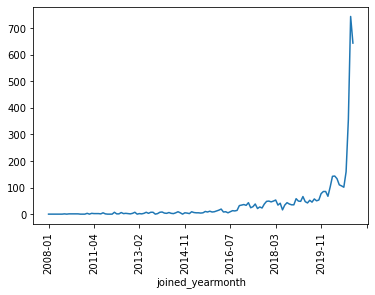

In [29]:
groupby_yearmonth_RU_count_df.plot()

plt.xticks(rotation=90)
plt.show()

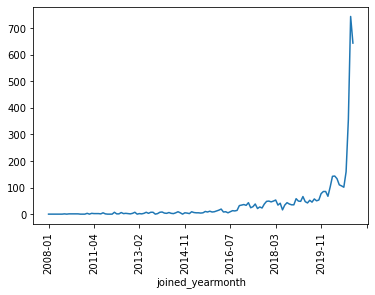

In [43]:
groupby_yearmonth_MX_count_df.plot()

plt.xticks(rotation=90)
plt.show()

In [11]:
groupby_yearmonth_CA_count_df.sort_values(ascending=False)

joined_yearmonth
2020-12    1023
2020-11     623
2021-01     621
2020-06     183
2020-10     134
           ... 
2007-12       1
2007-11       1
2007-10       1
2009-12       1
2007-07       1
Name: joined_yearmonth, Length: 157, dtype: int64

In [30]:
groupby_yearmonth_RU_count_df.sort_values(ascending=False)

joined_yearmonth
2020-12    743
2021-01    643
2020-11    356
2020-10    160
2020-05    144
          ... 
2013-10      1
2011-10      1
2011-11      1
2012-01      1
2008-01      1
Name: joined_yearmonth, Length: 135, dtype: int64

In [45]:
groupby_yearmonth_MX_count_df.sort_values(ascending=False)

joined_yearmonth
2020-12    743
2021-01    643
2020-11    356
2020-10    160
2020-05    144
          ... 
2013-10      1
2011-10      1
2011-11      1
2012-01      1
2008-01      1
Name: joined_yearmonth, Length: 135, dtype: int64

In [48]:
chessplayers_location_RU_df = chessplayers_RU_df.loc[chessplayers_RU_df["location"].notnull() == True]
chessplayers_location_CA_df = chessplayers_CA_df.loc[chessplayers_CA_df["location"].notnull() == True]
chessplayers_location_MX_df = chessplayers_MX_df.loc[chessplayers_MX_df["location"].notnull() == True]

In [36]:
chessplayers_location_RU_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_yearmonth
12,12,16283494,mihburkov,NaN,4,RU,Новосибирск,1610376123,1393772042,basic,False,2014-03-02,2014-03
13,13,30880098,brov79,NaN,2,RU,Калужская обл.,1610397178,1478987887,basic,False,2016-11-12,2016-11
14,14,37972722,kachviktor,NaN,3,RU,Санкт - Петербург,1610393077,1503240297,basic,False,2017-08-20,2017-08
33,33,34613006,fedyushin_sergei,NaN,12,RU,Stavropol,1610383508,1491637235,basic,False,2017-04-08,2017-04
34,34,31352522,piter31,NaN,3,RU,Санкт Петербург,1610368563,1480764449,basic,False,2016-12-03,2016-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,4973,76041278,slon65,NaN,0,RU,Москва,1610360371,1586341522,basic,False,2020-04-08,2020-04
4982,4982,61187578,djonnyfon,NaN,19,RU,Белгород,1610386967,1558296404,basic,False,2019-05-19,2019-05
4985,4985,11953018,ampelon,NaN,1,RU,Москва,1610402534,1369050960,basic,False,2013-05-20,2013-05
4993,4993,42693214,inkvizitor84,NaN,8,RU,Ростов-на-Дону,1610400010,1516945263,basic,False,2018-01-25,2018-01


In [38]:
chessplayers_location_CA_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_yearmonth
4,4,24503522,callumgmac,NaN,2,CA,Calgary,1610293656,1444440803,basic,False,2015-10-09,2015-10
13,13,7953674,johnnysus,NaN,4,CA,Burlington,1610302685,1340204514,premium,False,2012-06-20,2012-06
14,14,24610552,ddddan1,NaN,1,CA,North of Toronto,1610314257,1445031094,premium,False,2015-10-16,2015-10
23,23,13282036,tom-wong2285,NaN,14,CA,ontario,1610314953,1377471735,basic,False,2013-08-25,2013-08
35,35,73614820,mariomicka,NaN,15,CA,Vancouver,1610307249,1584340692,premium,False,2020-03-15,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,4962,13249516,asusintel,NaN,2,CA,BC,1610267932,1377249178,basic,False,2013-08-23,2013-08
4966,4966,94517526,shmulprince,NaN,7,CA,Toronto,1610323017,1604117190,premium,False,2020-10-30,2020-10
4977,4977,24861684,remib1994,NaN,3,CA,Montréal,1610316269,1446418150,basic,False,2015-11-01,2015-11
4987,4987,73199132,myles4833,NaN,10,CA,Peterborough,1610305126,1583640385,premium,False,2020-03-07,2020-03


In [49]:
chessplayers_location_MX_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_yearmonth
2,2,92190956,kikequesos,NaN,2,MX,Guadalajara Jalisco,1610408984,1601390156,basic,False,2020-09-29,2020-09
11,11,19572042,cvazquez48,NaN,11,MX,"Cuauhtémoc, Distrito Federal, Mexico",1610416425,1415077932,basic,False,2014-11-03,2014-11
22,22,95975744,gerasaurius42069,NaN,5,MX,mexico,1610395346,1604980851,premium,False,2020-11-09,2020-11
28,28,24398746,heislockote,NaN,4,MX,México,1610415268,1443851671,basic,False,2015-10-02,2015-10
34,34,45016248,canessa11,NaN,2,MX,Mich.,1610121720,1522970861,basic,False,2018-04-05,2018-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,4938,21552418,orgarcia18,NaN,4,MX,Guadalajara,1610361129,1426566608,basic,False,2015-03-16,2015-03
4955,4955,32587532,hectorspg,NaN,1,MX,México,1610098517,1485094392,basic,False,2017-01-22,2017-01
4966,4966,101092254,camcruz,NaN,0,MX,Monterrey,1610406188,1606901699,basic,False,2020-12-02,2020-12
4977,4977,38818046,solidvee,NaN,20,MX,The HA,1610406218,1505972376,basic,False,2017-09-20,2017-09
